# Tokenização

**Texto a analisar**

In [1]:
# Notar o uso do apóstrofo
texto = "O rato roeu a roupa do Rei de Roma. Em seguida, jogou-se n'água do Mar Tirreno... Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00."

**Manual**

In [2]:
tokens = texto.split()
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma.', 'Em', 'seguida,', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto:', 'R$', '10.000,00.']


**NLTK**

Vantagens: 

*   É possível tokenizar não só palavras, mas também sentenças.
*   O tokenizador considera especificidades linguísticas, como apóstrofos e hífens.



In [3]:
# Importação do módulo e dos recursos necessários
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/brunorosilva/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Tokenização de palavras e pontuação
from nltk import tokenize    
tokens = tokenize.word_tokenize(texto, language='portuguese')
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma', '.', 'Em', 'seguida', ',', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno', '...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto', ':', 'R', '$', '10.000,00', '.']


In [5]:
# Tokenização de sentenças
sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')
sents = sent_tokenizer.tokenize(texto)
print(sents)

['O rato roeu a roupa do Rei de Roma.', "Em seguida, jogou-se n'água do Mar Tirreno...", 'Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.']


**spaCy** 

Vantagem:

*   É o que mais bem funciona em geral.

Desvantagens:


*   Os modelos têm de estar pré-instalados;
*   O carregamento dos modelos na memória é lento;
*   Ocupa mais memória que o NLTK.


In [32]:
# Instalação/atualização do spaCy e dos modelos de língua
!pip3 install -U spacy

!python3 -m spacy download pt_core_news_sm  # Notar o "sm": Small Model

Requirement already up-to-date: spacy in /home/brunorosilva/.local/lib/python3.8/site-packages (3.0.3)
2021-03-08 23:57:12.662060: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2021-03-08 23:57:12.662100: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [34]:
# Importação do módulo e do modelo de língua
import spacy
!python3 -m spacy info  # P/ checar a versão (tem de ser >= 3.0)
nlp = spacy.load('pt_core_news_sm')

2021-03-08 23:57:23.819478: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2021-03-08 23:57:23.819514: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

============================== Info about spaCy ==============================

spaCy version    3.0.3                         
Location         /home/brunorosilva/.local/lib/python3.8/site-packages/spacy
Platform         Linux-5.8.0-44-generic-x86_64-with-glibc2.29
Python version   3.8.5                         
Pipelines        pt_core_news_lg (3.0.0), pt_core_news_sm (3.0.0)



In [35]:
# Tokenização de palavras e pontuação
def tokenizar(string):
    doc = nlp(string)
    return [t.text for t in doc]  #  Lista de atributos .text de cada token

tokens = tokenizar(texto)
print(tokens)

['O', 'Guarani', ',', 'de', 'José', 'de', 'Alencar', '\n', 'Fonte', ':', '\n', 'ALENCAR', ',', 'José', 'de', '.', 'O', 'guarani', '.', '20a', 'ed.', ',', 'São', 'Paulo', ':', 'Ática', ',', '1996', '(', 'Bom', 'Livro', ')', '.', '\n', 'Texto', 'proveniente', 'de', ':', '\n', 'A', 'Biblioteca', 'Virtual', 'do', 'Estudante', 'Brasileiro', '<', 'http://www.bibvirt.futuro.usp.br', '>', '\n', 'A', 'Escola', 'do', 'Futuro', 'da', 'Universidade', 'de', 'São', 'Paulo', '\n', 'Permitido', 'o', 'uso', 'apenas', 'para', 'fins', 'educacionais', '.', '\n', 'Este', 'material', 'pode', 'ser', 'redistribuído', 'livremente', ',', 'desde', 'que', 'não', 'seja', 'alterado', ',', 'e', 'que', 'as', 'informações', 'acima', 'sejam', '\n', 'mantidas', '.', 'Para', 'maiores', 'informações', ',', 'escreva', 'para', '<', 'bibvirt@futuro.usp.br', '>', '.', '\n', 'Estamos', 'em', 'busca', 'de', 'patrocinadores', 'e', 'voluntários', 'para', 'nos', 'ajudar', 'a', 'manter', 'este', 'projeto', '.', 'Se', 'você', 'quer'

In [36]:
# Tokenização de sentenças
def sents(string):
    doc = nlp(string)
    return doc.sents 

for s in sents(texto):
    print(s)

O Guarani, de José de Alencar
Fonte:
ALENCAR, José de.
O guarani.
20a ed., São Paulo: Ática, 1996 (Bom Livro).


Texto proveniente de:

A Biblioteca Virtual do Estudante Brasileiro <http://www.bibvirt.futuro.usp.br>

A Escola do Futuro da Universidade de São Paulo

Permitido o uso apenas para fins educacionais.

Este material pode ser redistribuído livremente, desde que não seja alterado, e que as informações acima sejam
mantidas.
Para maiores informações, escreva para <bibvirt@futuro.usp.br>.


Estamos em busca de patrocinadores e voluntários para nos ajudar a manter este projeto.
Se você quer ajudar de
alguma forma, mande um e-mail para <bibvirt@futuro.usp.br> e saiba como isso é possível.

                                                 O Guarani
                                                  José de Alencar
                                                   PRÓLOGO

Minha prima.
—
Gostou da minha história, e pede-me um romance;
acha que posso fazer
alguma coisa neste ramo de li



Eis pois a razão por que Cecília recomendava a Peri que estivesse quieto e sossegado;
é
verdade que ela sabia que essa recomendação era sempre inútil, e que o índio faria tudo para
que uma abelha sequer não viesse beijar os seus lábios vermelhos confundindo-os com uma
flor de pequiá.


Quando as duas mocas atravessaram a esplanada, Álvaro passeava junto da escada.

Cecília saudou de passagem com um sorriso ao jovem cavalheiro; e desceu ligeiramente
seguida por sua prima.


Álvaro que tinha procurado ler-lhe nos olhos e no rosto o perdão de sua loucura da véspera, e
nada havia percebido que acabasse com o seu receio, quis seguir a moça, e falar-lhe.

Voltou-se para ver se alguém estava ali que reparasse no que ia fazer, e deu com o italiano
que a dois passos dele o olhava com um dos seus sorrisos sarcásticos.

— Bom dia, sr. cavalheiro.


Os dois inimigos trocaram um olhar que se cruzara como laminas de aço que rogassem uma
na outra.


Nesse momento
Peri se aproximava lentamente deles

sangue!...
”

O moribundo parou um momento extenuado; depois continuou com a voz débil:


“Já então com a chegada do governador D. Francisco de Sousa se sabia que Robério oferecera
em Madri a Filipe 11 a descoberta das minas, e que não o tendo el-rei premiado como
esperou, obstinava-se em guardar silêncio.


“A razão desse silêncio que se atribuía geralmente ao despeito, só a sabia meu parente em
cujas mãos parava o roteiro;
Robério chegado às Espanhas se apercebera do roubo que lhe
haviam feito, e quisera aos menos lograr o prêmio.


“O segredo das minas, a chave dessa riqueza imensa que excedia todos os tesouros do
Miramolim, estavam nas mãos do meu parente que, necessitando de um homem dedicado que
o auxiliasse na empresa, julgou que a ninguém melhor do que a mim podia escolher para
partilhar os seus riscos e esperanças.


“Aceitei essa meação do crime, esse pacto de roubo, meu padre...
Foi o meu primeiro erro!
...
”

A voz do aventureiro tornou-se ainda mais sumida.
O frade inclina

— Ele quem?

—
Álvaro.


A moça corou;
mas o susto reprimiu o pejo; abaixando os olhos sobre o precipício, tinha visto
um réptil deslizando pela folhagem e ouvido o murmúrio confuso e sinistro que vinha do
fundo do abismo.

—
Peri, disse empalidecendo, não desças; volta!

—
Não;
Peri não volta sem trazer o que te fez chorar.

—
Mas tu vais morrer!

—
Não tem medo.

—
Peri, disse Cecília com severidade, tua senhora manda que não desças.


O índio parou indeciso;
uma ordem de sua senhora era uma fatalidade para ele;
cumpria-se
irremissivelmente.


Fitou na moça um olhar tímido; nesse momento Cecília, vendo Álvaro na ponta da esplanada
junto da cabana do selvagem, retirava-se para dentro da janela corando.


O índio sorriu.

—
Peri desobedecer à tua voz, senhora, para obedecer ao teu coração.
E o índio desapareceu
sob as trepadeiras que cobriam o precipício.
Cecília soltou um grito, e debruçou-se no
parapeito à janela.

                                    VIII
O BRACELETE

O que Cecília v


—
Sim.

—
Admitis que fosse um homem?

—
Admito tudo.

—
Jurais.

—
Juro.

—
Sobre...
—
Sobre a minha salvação.


O italiano soltou o braço do miserável, que caiu de joelhos pedindo ao Deus que ofendia
perdão para o perjúrio que acabava de cometer.


Rui Soeiro voltou: os três seguiram calados o caminho que tinham feito, Loredano pensativo,
seus companheiros cabisbaixos.

Sentaram-se à sombra de uma árvore; ai permaneceram quase uma hora, sem saber o que
deviam fazer, nem o que podiam esperar.
A posição era critica, reconheciam que se achavam

num desses lances da vida, em que um passo, um movimento, precipita o homem no fundo do
abismo, ou o salva da morte que vai cair sobre ele.


Loredano media a situação com a audácia e energia que nunca o abandonava nas ocasiões
extremas;
uma lata violenta se travara neste homem; só tinha agora um sentimento, uma fibra;

era a sede ardente do gozo, sensualidade exacerbada pelo ascetismo do claustro e o
isolamento do deserto.
Comprimida desde a in

—
E não passa desta noite.
O corpo de Bento
Simões pede justiça.

—
E justiça será feita.

—
Neste mesmo instante.

—
Sim, agora mesmo.
Eia! Segui-me.


Loredano ouvia estas exclamações rápidas que denunciavam como a exacerbação ia lavrando
com intensidade; quando porém os aventureiros quiseram lançar-se em procura do índio,
ele
os conteve com um gesto.

Não lhe convinha isto; a morte de Peri era coisa acidental para ele; o seu fim principal era
outro, e esperava consegui-lo facilmente.

—
O que ides fazer? perguntou imperativamente aos seus companheiros.


Os aventureiros ficaram pasmados com semelhante pergunta.

—
Ides matá-lo?
...

—
Mas decerto!

—
E não sabeis que não podereis fazê-lo?
Que ele é protegido, amado, estimado por aqueles
que pouco se importam se morremos ou vivemos?

—
Seja embora protegido, quando é criminoso...

—
Como vos iludis!
Quem o julgará criminoso?
Vós?
Pois bem; outros julgarão inocente e o
defenderão; e não tereis remédio senão curvar a cabeça e calar-vos


O velho selvagem soltou um bramido, que repercutiu ao longe pelos ecos da floresta, e
levantando ao céu o seu punho decepado atirou as gotas de sangue que vertiam, sobre os
Aimorés, como conjurando-os à vingança.


Os guerreiros lançaram-se para vingar o seu chefe;
mas um novo espetáculo se apresentava
aos seus olhos.


Peri, vencedor do cacique, volveu um olhar em torno dele, e vendo O estrago que tinha feito,
os cadáveres dos Aimóres amontoados uns sobre os outros, fincou a ponta do montante no
chão e quebrou a lamina.
Tomou depois os dois fragmentos e atirou-os ao rio.


Então passou-se nele uma luta silenciosa, mas terrível para quem pudesse compreendê-la.

Tinha quebrado a sua espada, porque não queria mais combater; e decidira que era tempo de
suplicar a vida ao inimigo.

Mas quando chegou o momento de realizar essa súplica, conheceu que exigia de si mesmo
uma coisa sobre-humana, uma coisa superior às suas forças.

Ele, Peri, o guerreiro invencível, ele, o selvagem livre, o senh

pelo clarão instantâneo do relâmpago.


Um estampido horrível reboou por toda aquela solidão: a terra tremeu, e as águas do rio se
encapelaram como batidas pelo tufão.
As trevas envolveram o rochedo há pouco esclarecido
pelas chamas, e tudo entrou de novo no silêncio profundo da noite.


Um soluço partiu o peito de Peri, talvez a única testemunha dessa grande catástrofe.


Dominando a sua dor, o índio vergou sobre o remo, e a canoa voou pela face lisa e polida do
Paquequer.

                                          XI EPÍLOGO

Quando o sol, erguendo-se no horizonte, iluminou os campos, um montão de ruínas cobria as
margens do Paquequer.

Grandes lascas de rochedos, talhadas de um golpe e semeadas pelo campo, pareciam ter
saltado do malho gigantesco de Novos Ciclopes.


A eminência sobre a qual estava situada a casa tinha desaparecido, e no seu lugar via-se
apenas uma larga fenda semelhante à cratera de algum vulcão subterrâneo.


As árvores arrancadas dos seus alvéolos, a terra revolt

# Limpeza

In [10]:
def limpar(lista):
    return [i.lower() for i in lista if i.isalpha()]

# Palavras vazias

**NLTK**

*   Uma lista pequena, mas rápida de se carregar.

In [11]:
nltk.download('stopwords')
stops_nltk = nltk.corpus.stopwords.words('portuguese')

len(stops_nltk)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/brunorosilva/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


204

**spaCy**


*   Uma lista mais abrangente, mas mais lenta e com mais exigência de memória para carregar o modelo.
* Atenção! A "lista" do spaCy é, na verdade, um conjunto (set).




In [12]:
stops_spacy = nlp.Defaults.stop_words

len(stops_spacy)

416

**União das duas listas**

In [13]:
stops = set(stops_nltk) | stops_spacy

len(stops)

499

# Stemização
Exclusivamente no NLTK

In [14]:
# Carregamento do stemizador
nltk.download('rslp')
raiz = nltk.stem.RSLPStemmer().stem

print(raiz('nada'))
print(raiz('nadinha'))
print(raiz('nadabóbora'))

[nltk_data] Downloading package rslp to
[nltk_data]     /home/brunorosilva/nltk_data...


nad
nad
nadabób


[nltk_data]   Unzipping stemmers/rslp.zip.


# Lematização


*   Exclusivamente no spaCy
*   O resultado tem muitos erros mas, ao usar o modelo grande (large), a performance melhora.



In [16]:
# Baixando o modelo de língua grande (lg) para o português
!python3 -m spacy download pt_core_news_lg

nlp = spacy.load('pt_core_news_lg')

2021-03-08 22:08:37.080890: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2021-03-08 22:08:37.080944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 578.1 MB 16 kB/s s eta 0:00:01     |█████████████████▎              | 312.9 MB 9.2 MB/s eta 0:00:29     |█████████████████████▉          | 393.7 MB 17.8 MB/s eta 0:00:11     |██████████████████████████▏     | 471.9 MB 20.8 MB/s eta 0:00:06
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [17]:
def lema(string):
    doc = nlp(string)
    return [token.lemma_ for token in doc]

print(lema('Se estas palavras fossem lematizadas, ficariam muitíssimo diferentes.'))
print(lema('Seu memorando é uma pancada de ferro que não vale nada.'))

['Se', 'este', 'palavra', 'ser', 'lematizar', ',', 'ficar', 'muito', 'diferente', '.']
['Seu', 'memorar', 'ser', 'umar', 'pancada', 'de', 'ferrar', 'que', 'não', 'valer', 'nado', '.']


# Hápax Legômena

In [18]:
# Para criar uma lista de hápax legômena
def hapax(lista):
    return [i for i in lista if lista.count(i) == 1]

# Para eliminá-los da lista de tokens
def sem_hapax(lista):
    return [i for i in lista if lista.count(i) > 1]

# Mãos à obra!
Vamos trabalhar com a leitura de um arquivo de texto bruto e aplicação do pipeline completo de pré-processamento dos dados e a contagem das unidades lexicais que vimos até agora. Usaremos o livro "O Guarani", de José de Alencar.

**Exercícios**

1. Abra o arquivo "Guarani.txt" e calcule:

*   O número total de caracteres
*   O número de caracteres sem espaços em branco
*   O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)
*   A riqueza lexical


2. Mostre as 20 palavras mais frequentes do texto em ordem descrescente de ocorrência.

3. Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

4. Calcule:
*   O vocabulário do livro (o número de lemas)
*   A riqueza vocabular. Compare com a riqueza lexical.

5. Reduza os tokens a raízes.
* O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
* Discuta as vantagens e os riscos implicados no uso de um ou outro.


6. Crie uma lista dos hápax legômena e responda: 
* Qual a proporção de hápax legômena no vocabulário?
* Exiba os 50 primeiros hápax legômena da sua lista. Baseando-se no que você vê, será que existem traços em comum entre eles?  Discuta se poderiam ser eliminados sem prejuízo para uma análise do conteúdo do texto.

7. Crie uma versão do livro "privilegiando o conteúdo": uma lista sem hápax legômena, sem palavras vazias e com as palavras restantes stemizadas. 
* Compare o número de tokens desse "livro" com o primeiro cálculo de tokens, aquele sobre o texto original. 
* Leia o resultado. Que tal?...





In [30]:
#@title
#Exercício 1
arq = open('Guarani.txt', 'r')
texto = arq.read()
arq.close()

print('Caracteres: ', len(texto))
print('Caracteres sem espaços: ', len(texto) - texto.count(' '))
tokens = limpar(tokenizar(texto))
print('Palavras: ', len(tokens))
print('Riqueza lexical: ', len(set(tokens)) / len(tokens))



Caracteres:  626296
Caracteres sem espaços:  523030
Palavras:  103688
Riqueza lexical:  0.10305917753259779


In [20]:
#@title
# Exercício 2
from collections import Counter
c = Counter(tokens)
for e, i in enumerate(c.most_common(20)):
    print(e, i)

0 ('a', 4392)
1 ('que', 4283)
2 ('o', 3899)
3 ('de', 3867)
4 ('e', 3587)
5 ('um', 1653)
6 ('do', 1367)
7 ('não', 1276)
8 ('uma', 1183)
9 ('se', 1090)
10 ('da', 1087)
11 ('os', 1045)
12 ('com', 1011)
13 ('sua', 917)
14 ('para', 849)
15 ('seu', 771)
16 ('peri', 728)
17 ('em', 698)
18 ('as', 697)
19 ('por', 655)


In [21]:
#@title
# Exercício 4
lemas = lema(' '.join(tokens))
vocab = set(lemas)
print('Vocabulário: ', len(vocab), ' palavras.')
print('Riqueza vocabular: ', len(vocab) / len(lemas))

Vocabulário:  5313  palavras.
Riqueza vocabular:  0.05124025923925623


In [22]:
#@title
# Exercício 5
raizes = [raiz(t) for t in tokens]
print('Cardinalidade do conjunto de raízes: ', len(set(raizes)))

Cardinalidade do conjunto de raízes:  4665


In [23]:
#@title
# Exercício 6
hap = hapax(tokens)
print('Os hápax legômena ocupam ', len(hap)/len(set(tokens)), ' do conjunto total de tokens.')
print(hap[:49])

Os hápax legômena ocupam  0.49391727493917276  do conjunto total de tokens.
['ática', 'texto', 'biblioteca', 'virtual', 'estudante', 'escola', 'universidade', 'permitido', 'educacionais', 'redistribuído', 'alterado', 'mantidas', 'patrocinadores', 'voluntários', 'manter', 'você', 'mande', 'prólogo', 'gostou', 'literatura', 'impressionou', 'errar', 'habilitado', 'remoçar', 'encontrei', 'armário', 'comprei', 'estragado', 'cupim', 'roedor', 'dilúvio', 'arca', 'cataclisma', 'encontrará', 'comuns', 'condene', 'leitura', 'explicam', 'carlota', 'decifrado', 'inverno', 'escurece', 'dezembro', 'leitor', 'publicado', 'tipográfica', 'dispusesse', 'empenho', 'público']


In [24]:
#@title
# Exercício 7
tokens_plenos = [t for t in tokens if t not in stops]
tokens_plenos_2 = sem_hapax(tokens_plenos)
raiz_tokens_plenos_2 = [raiz(t) for t in tokens_plenos_2]
print('Raízes sem stopwords e sem hápax legômena: ', len(raiz_tokens_plenos_2))
print(' '.join(raiz_tokens_plenos_2[1000:1050]))

Raízes sem stopwords e sem hápax legômena:  41911
produt anteri saíd lisbo metad band aventur ia cidad rio jan ganh objet necess volt cont lucr pertenc fidalg chef igual quarent aventur receb dinh objet viv quas sert desconhec pequen hom lei uso costum si amb riqu lig chef respeit hábit obedi superior moral intelig corag mass antôni companh


**Bônus: Geração de nuvens de palavras**

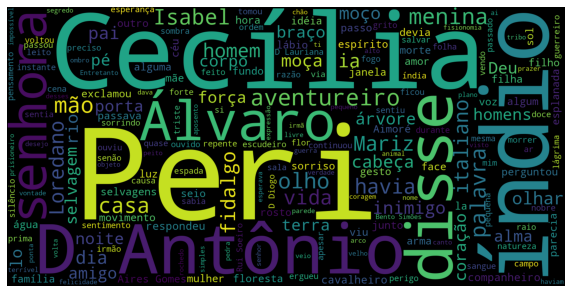

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nuvem = WordCloud(stopwords=stops,
                    background_color='black',
                    width=1600, height=800).generate(texto)
 
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(nuvem, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvem);